In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(35)

# Part 1
Advantage: Potentially better capturing if the non-linear relationships between quality levels.
Disadvantage: It doesn't take into account that there is a ordinal nature. (7 is closer to 8 than 1)

In [66]:
wine_data_red = pd.read_csv('Assignment 2 data/winequality-red.csv',delimiter=";")
wine_data_white = pd.read_csv('Assignment 2 data/winequality-white.csv', delimiter=";")
wine_data_red["Category"] = 1
wine_data_white["Category"] = 0
wine_data = pd.concat([wine_data_white, wine_data_red], ignore_index=True)
wine_data.head() 
X_wine = wine_data.drop('quality', axis=1)
y_wine = wine_data['quality']

from sklearn.model_selection import train_test_split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    X_wine, y_wine, test_size=0.2, random_state=42
)

wine_classifier = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
wine_classifier.fit(X_train_wine, y_train_wine)
wine_score = wine_classifier.score(X_test_wine, y_test_wine)
print(f"Wine Quality Classification Accuracy: {wine_score:.4f}")

c:\Users\dsour\MachineLearning_A3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Wine Quality Classification Accuracy: 0.5392


c:\Users\dsour\MachineLearning_A3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Part 2

Data loading and preprocessing

In [67]:
train_data = pd.read_csv("Assignment 3 data/train.csv")
test_data = pd.read_csv("Assignment 3 data/test.csv")
test_label = pd.read_csv("Assignment 3 data/test_label.csv")

In [68]:
print("\nTraining data info:")
train_data.info()
print("\nFirst few rows:")
train_data.head()


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12870 entries, 0 to 12869
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         12870 non-null  int64 
 1   age        12870 non-null  int64 
 2   job        12870 non-null  object
 3   marital    12870 non-null  object
 4   education  12870 non-null  object
 5   default    12870 non-null  object
 6   balance    12870 non-null  int64 
 7   housing    12870 non-null  object
 8   loan       12870 non-null  object
 9   contact    12870 non-null  object
 10  day        12870 non-null  int64 
 11  month      12870 non-null  object
 12  campaign   12870 non-null  int64 
 13  pdays      12870 non-null  int64 
 14  previous   12870 non-null  int64 
 15  poutcome   12870 non-null  object
 16  y          12870 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.7+ MB

First few rows:


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,13829,29,technician,single,tertiary,no,18254,no,no,cellular,11,may,2,-1,0,unknown,no
1,22677,26,services,single,secondary,no,512,yes,yes,unknown,5,jun,3,-1,0,unknown,no
2,10541,30,management,single,secondary,no,135,no,no,cellular,14,aug,2,-1,0,unknown,no
3,13689,41,technician,married,unknown,no,30,yes,no,cellular,10,jul,1,-1,0,unknown,no
4,11304,27,admin.,single,secondary,no,321,no,yes,unknown,2,sep,1,-1,0,unknown,no


In [69]:
X_train = train_data.drop(['y', 'ID'], axis=1)
y_train = train_data['y']

X_test = test_data.drop(['ID'], axis=1)
y_test = test_label['y']

print("Training features shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Training features shape: (12870, 15)
Training target shape: (12870,)
Test features shape: (4291, 15)
Test target shape: (4291,)


In [70]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print("\nAfter one-hot encoding:")
print("Training features shape:", X_train_encoded.shape)
print("Test features shape:", X_test_encoded.shape)
print("\nFirst few columns:", X_train_encoded.columns[:10].tolist())


After one-hot encoding:
Training features shape: (12870, 41)
Test features shape: (4291, 41)

First few columns: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management']


LinearSCV Classifier

In [71]:
# LinearSVC classifier with the StandardScaler
pipeline_svc_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(random_state=42, max_iter=5000))
])

param_grid_svc = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_svc_scaled = GridSearchCV(
    pipeline_svc_scaled, 
    param_grid_svc, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)

grid_svc_scaled.fit(X_train_encoded, y_train)

print(f"Best C parameter: {grid_svc_scaled.best_params_['classifier__C']}")
print(f"Best cross-validation score: {grid_svc_scaled.best_score_:.4f}")

svc_scaled_train_score = grid_svc_scaled.score(X_train_encoded, y_train)
svc_scaled_test_score = grid_svc_scaled.score(X_test_encoded, y_test)
print(f"Training accuracy: {svc_scaled_train_score:.4f}")
print(f"Test accuracy: {svc_scaled_test_score:.4f}")

Best C parameter: 1
Best cross-validation score: 0.7675
Training accuracy: 0.7694
Test accuracy: 0.7763


In [72]:
# LinearSVC classifier without the StandardScaler

pipeline_svc_unscaled = Pipeline([
    ('classifier', LinearSVC(random_state=42, max_iter=5000))
])

param_grid_svc_unscaled = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_svc_unscaled = GridSearchCV(
    pipeline_svc_unscaled,
    param_grid_svc_unscaled,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svc_unscaled.fit(X_train_encoded, y_train)

print(f"Best C parameter: {grid_svc_unscaled.best_params_['classifier__C']}")
print(f"Best cross-validation score: {grid_svc_unscaled.best_score_:.4f}")

svc_unscaled_train_score = grid_svc_unscaled.score(X_train_encoded, y_train)
svc_unscaled_test_score = grid_svc_unscaled.score(X_test_encoded, y_test)
print(f"Training accuracy: {svc_unscaled_train_score:.4f}")
print(f"Test accuracy: {svc_unscaled_test_score:.4f}")

Best C parameter: 1
Best cross-validation score: 0.7677
Training accuracy: 0.7681
Test accuracy: 0.7742


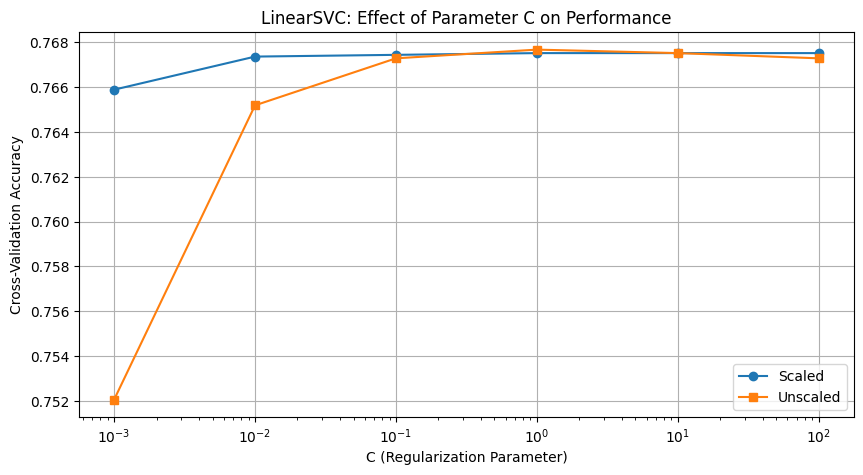

In [73]:
# Visualizing effect of C parameter
C_values = param_grid_svc['classifier__C']
cv_results_scaled = grid_svc_scaled.cv_results_
cv_results_unscaled = grid_svc_unscaled.cv_results_

plt.figure(figsize=(10, 5))
plt.plot(C_values, cv_results_scaled['mean_test_score'], marker='o', label='Scaled')
plt.plot(C_values, cv_results_unscaled['mean_test_score'], marker='s', label='Unscaled')
plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('LinearSVC: Effect of Parameter C on Performance')
plt.legend()
plt.grid(True)
plt.show()

Higher C seems to fit the training data better with 1 being the best result. Scaling helps when the regularization parameter C is small.

LogisticRegression Classifier

In [74]:
# LogisticRegression model with the StandardScaler
pipeline_lr_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=5000))
])

param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_lr_scaled = GridSearchCV(
    pipeline_lr_scaled,
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr_scaled.fit(X_train_encoded, y_train)

print(f"Best C parameter: {grid_lr_scaled.best_params_['classifier__C']}")
print(f"Best cross-validation score: {grid_lr_scaled.best_score_:.4f}")

lr_scaled_train_score = grid_lr_scaled.score(X_train_encoded, y_train)
lr_scaled_test_score = grid_lr_scaled.score(X_test_encoded, y_test)
print(f"Training accuracy: {lr_scaled_train_score:.4f}")
print(f"Test accuracy: {lr_scaled_test_score:.4f}")

Best C parameter: 1
Best cross-validation score: 0.7726
Training accuracy: 0.7743
Test accuracy: 0.7800


In [75]:
# LogisticRegression model without the scaling
pipeline_lr_unscaled = Pipeline([
    ('classifier', LogisticRegression(random_state=42, max_iter=5000))
])

grid_lr_unscaled = GridSearchCV(
    pipeline_lr_unscaled,
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr_unscaled.fit(X_train_encoded, y_train)

print(f"Best C parameter: {grid_lr_unscaled.best_params_['classifier__C']}")
print(f"Best cross-validation score: {grid_lr_unscaled.best_score_:.4f}")

lr_unscaled_train_score = grid_lr_unscaled.score(X_train_encoded, y_train)
lr_unscaled_test_score = grid_lr_unscaled.score(X_test_encoded, y_test)
print(f"Training accuracy: {lr_unscaled_train_score:.4f}")
print(f"Test accuracy: {lr_unscaled_test_score:.4f}")

Best C parameter: 10
Best cross-validation score: 0.7725
Training accuracy: 0.7733
Test accuracy: 0.7800


c:\Users\dsour\MachineLearning_A3\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


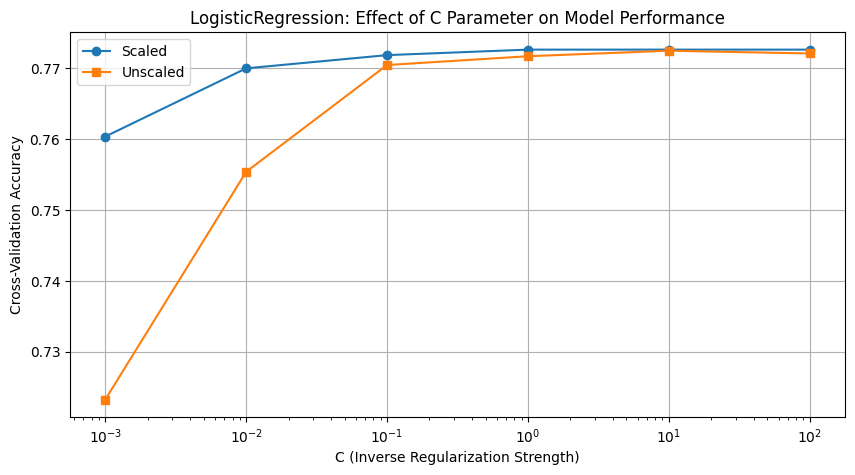

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(C_values, grid_lr_scaled.cv_results_['mean_test_score'], marker='o', label='Scaled')
plt.plot(C_values, grid_lr_unscaled.cv_results_['mean_test_score'], marker='s', label='Unscaled')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('LogisticRegression: Effect of C Parameter on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

Very low C causes underfitting. Scaling improves the model, especially with a lower C.

KNeighbors Classifier

In [77]:
# KNeighborsClassifier model with the StandardScaler
pipeline_knn_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 21]
}

grid_knn_scaled = GridSearchCV(
    pipeline_knn_scaled,
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn_scaled.fit(X_train_encoded, y_train)

print(f"Best n_neighbors: {grid_knn_scaled.best_params_['classifier__n_neighbors']}")
print(f"Best cross-validation score: {grid_knn_scaled.best_score_:.4f}")

knn_scaled_train_score = grid_knn_scaled.score(X_train_encoded, y_train)
knn_scaled_test_score = grid_knn_scaled.score(X_test_encoded, y_test)
print(f"Training accuracy: {knn_scaled_train_score:.4f}")
print(f"Test accuracy: {knn_scaled_test_score:.4f}")

Best n_neighbors: 21
Best cross-validation score: 0.7704
Training accuracy: 0.7807
Test accuracy: 0.7716


In [78]:
# KNeighborsClassifier model without the scaling
pipeline_knn_unscaled = Pipeline([
    ('classifier', KNeighborsClassifier())
])

grid_knn_unscaled = GridSearchCV(
    pipeline_knn_unscaled,
    param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn_unscaled.fit(X_train_encoded, y_train)

print(f"Best n_neighbors: {grid_knn_unscaled.best_params_['classifier__n_neighbors']}")
print(f"Best cross-validation score: {grid_knn_unscaled.best_score_:.4f}")

knn_unscaled_train_score = grid_knn_unscaled.score(X_train_encoded, y_train)
knn_unscaled_test_score = grid_knn_unscaled.score(X_test_encoded, y_test)
print(f"Training accuracy: {knn_unscaled_train_score:.4f}")
print(f"Test accuracy: {knn_unscaled_test_score:.4f}")

Best n_neighbors: 21
Best cross-validation score: 0.7131
Training accuracy: 0.7319
Test accuracy: 0.7138


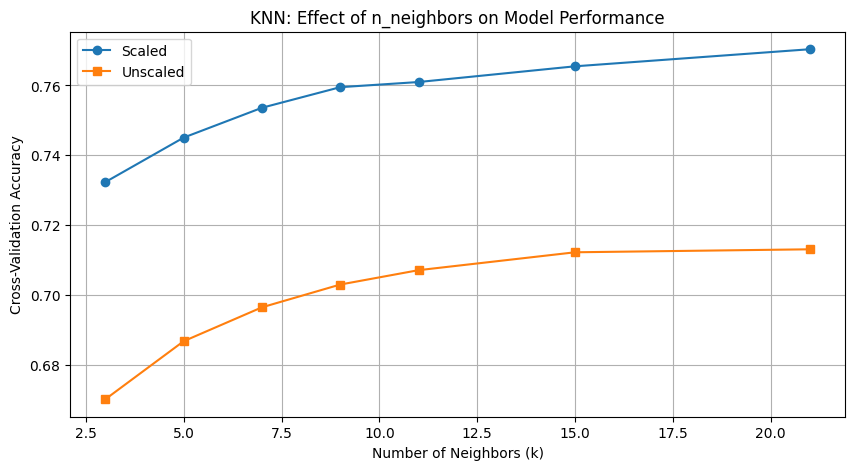

In [79]:
n_neighbors_values = param_grid_knn['classifier__n_neighbors']

plt.figure(figsize=(10, 5))
plt.plot(n_neighbors_values, grid_knn_scaled.cv_results_['mean_test_score'], marker='o', label='Scaled')
plt.plot(n_neighbors_values, grid_knn_unscaled.cv_results_['mean_test_score'], marker='s', label='Unscaled')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN: Effect of n_neighbors on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

Higher k => increasing bias. Scaling improves performance a lot.

Evaluation Metrics

In [80]:
def evaluate_model(model, X_test, y_test, model_name):
    """Compute and display evaluation metrics for a model"""
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision_macro = precision_score(y_test, y_pred, average='macro')
    precision_micro = precision_score(y_test, y_pred, average='micro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    recall_micro = recall_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_micro = f1_score(y_test, y_pred, average='micro')
    
    print(f"\n{'='*60}")
    print(f"Evaluation Metrics: {model_name}")
    print(f"{'='*60}")
    print(f"Accuracy:                {accuracy:.4f}")
    print(f"Precision (Macro):       {precision_macro:.4f}")
    print(f"Precision (Micro):       {precision_micro:.4f}")
    print(f"Recall (Macro):          {recall_macro:.4f}")
    print(f"Recall (Micro):          {recall_micro:.4f}")
    print(f"F1 Score (Macro):        {f1_macro:.4f}")
    print(f"F1 Score (Micro):        {f1_micro:.4f}")
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'precision_micro': precision_micro,
        'recall_macro': recall_macro,
        'recall_micro': recall_micro,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro
    }

In [81]:
results = []

results.append(evaluate_model(grid_svc_scaled, X_test_encoded, y_test, "LinearSVC (Scaled)"))
results.append(evaluate_model(grid_svc_unscaled, X_test_encoded, y_test, "LinearSVC (Unscaled)"))
results.append(evaluate_model(grid_lr_scaled, X_test_encoded, y_test, "LogisticRegression (Scaled)"))
results.append(evaluate_model(grid_lr_unscaled, X_test_encoded, y_test, "LogisticRegression (Unscaled)"))
results.append(evaluate_model(grid_knn_scaled, X_test_encoded, y_test, "KNN (Scaled)"))
results.append(evaluate_model(grid_knn_unscaled, X_test_encoded, y_test, "KNN (Unscaled)"))


Evaluation Metrics: LinearSVC (Scaled)
Accuracy:                0.7763
Precision (Macro):       0.7765
Precision (Micro):       0.7763
Recall (Macro):          0.6675
Recall (Micro):          0.7763
F1 Score (Macro):        0.6844
F1 Score (Micro):        0.7763

Evaluation Metrics: LinearSVC (Unscaled)
Accuracy:                0.7742
Precision (Macro):       0.7747
Precision (Micro):       0.7742
Recall (Macro):          0.6637
Recall (Micro):          0.7742
F1 Score (Macro):        0.6800
F1 Score (Micro):        0.7742

Evaluation Metrics: LogisticRegression (Scaled)
Accuracy:                0.7800
Precision (Macro):       0.7739
Precision (Micro):       0.7800
Recall (Macro):          0.6782
Recall (Micro):          0.7800
F1 Score (Macro):        0.6961
F1 Score (Micro):        0.7800

Evaluation Metrics: LogisticRegression (Unscaled)
Accuracy:                0.7800
Precision (Macro):       0.7745
Precision (Micro):       0.7800
Recall (Macro):          0.6778
Recall (Micro):   


Model Comparison Summary
                        model  accuracy  precision_macro  precision_micro  recall_macro  recall_micro  f1_macro  f1_micro
           LinearSVC (Scaled)  0.776276         0.776474         0.776276      0.667546      0.776276  0.684424  0.776276
         LinearSVC (Unscaled)  0.774179         0.774662         0.774179      0.663722      0.774179  0.679986  0.774179
  LogisticRegression (Scaled)  0.780005         0.773882         0.780005      0.678213      0.780005  0.696068  0.780005
LogisticRegression (Unscaled)  0.780005         0.774470         0.780005      0.677793      0.780005  0.695655  0.780005
                 KNN (Scaled)  0.771615         0.750067         0.771615      0.676556      0.771615  0.692454  0.771615
               KNN (Unscaled)  0.713820         0.659654         0.713820      0.582130      0.713820  0.578551  0.713820


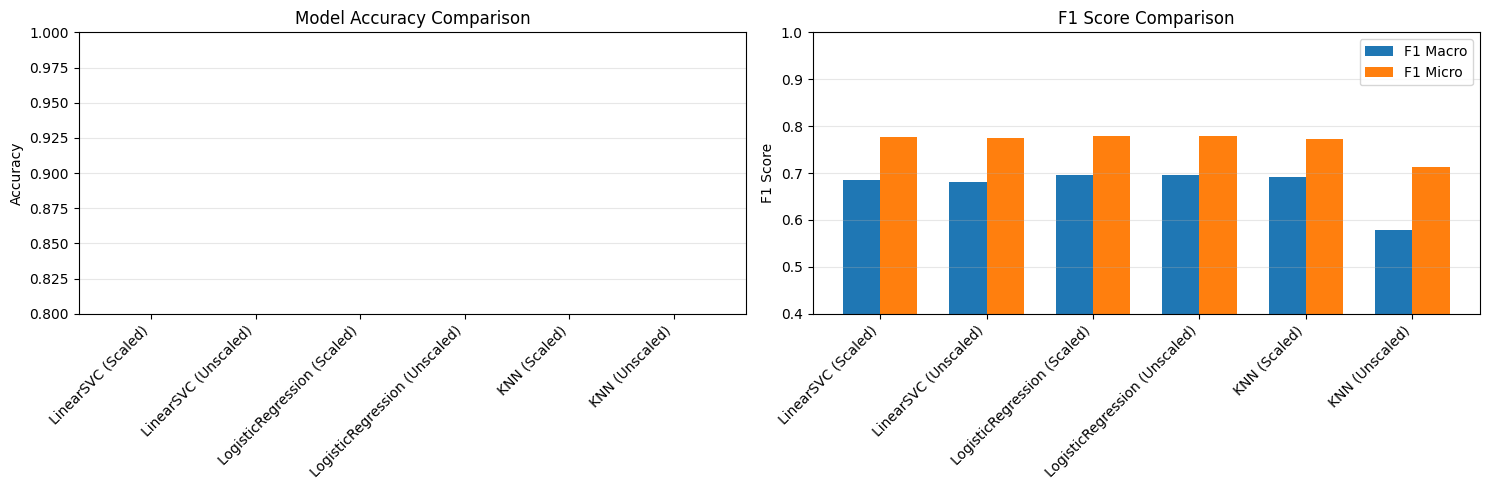

In [ ]:
# Add together
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


Analysis: 

# Part 4


DecisionTreeClasifier

In [83]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_encoded, y_train)

dt_train_acc = dt_classifier.score(X_train_encoded, y_train)
dt_test_acc = dt_classifier.score(X_test_encoded, y_test)

print(f"Training accuracy: {dt_train_acc:.4f}")
print(f"Test accuracy: {dt_test_acc:.4f}")
print(f"Accuracy difference (overfitting indicator): {dt_train_acc - dt_test_acc:.4f}")

Training accuracy: 1.0000
Test accuracy: 0.6891
Accuracy difference (overfitting indicator): 0.3109


In [84]:
dt_basic_results = evaluate_model(dt_classifier, X_test_encoded, y_test, "DecisionTree (Basic)")


Evaluation Metrics: DecisionTree (Basic)
Accuracy:                0.6891
Precision (Macro):       0.6400
Precision (Micro):       0.6891
Recall (Macro):          0.6451
Recall (Micro):          0.6891
F1 Score (Macro):        0.6421
F1 Score (Micro):        0.6891


Decision trees are **NOT resilient to overfitting**

In [85]:
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'max_features': ['sqrt', 'log2', None]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt.fit(X_train_encoded, y_train)

print(f"\nBest parameters:")
print(f"  max_depth: {grid_dt.best_params_['max_depth']}")
print(f"  max_features: {grid_dt.best_params_['max_features']}")
print(f"\nBest cross-validation score: {grid_dt.best_score_:.4f}")

dt_tuned_train_acc = grid_dt.score(X_train_encoded, y_train)
dt_tuned_test_acc = grid_dt.score(X_test_encoded, y_test)
print(f"Training accuracy: {dt_tuned_train_acc:.4f}")
print(f"Test accuracy: {dt_tuned_test_acc:.4f}")
print(f"Accuracy difference: {dt_tuned_train_acc - dt_tuned_test_acc:.4f}")


Best parameters:
  max_depth: 7
  max_features: None

Best cross-validation score: 0.7677
Training accuracy: 0.7813
Test accuracy: 0.7716
Accuracy difference: 0.0097


In [86]:
results_dt = pd.DataFrame(grid_dt.cv_results_)

pivot_table = results_dt.pivot_table(
    values='mean_test_score',
    index='param_max_features',
    columns='param_max_depth'
)

print(pivot_table)

param_max_depth           3         5         7         10        15        20
param_max_features                                                            
log2                0.748252  0.748640  0.758120  0.754157  0.750117  0.734343
sqrt                0.716706  0.738073  0.745688  0.749417  0.746076  0.727117


RandomForest Classifier

In [87]:
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_classifier.fit(X_train_encoded, y_train)

rf_train_acc = rf_classifier.score(X_train_encoded, y_train)
rf_test_acc = rf_classifier.score(X_test_encoded, y_test)

print(f"Training accuracy: {rf_train_acc:.4f}")
print(f"Test accuracy: {rf_test_acc:.4f}")
print(f"Accuracy difference: {rf_train_acc - rf_test_acc:.4f}")

Training accuracy: 0.9999
Test accuracy: 0.7816
Accuracy difference: 0.2183


In [88]:
param_grid_rf = {
    'max_depth': [5, 10, 15, 20, None],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [50, 100, 200]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_encoded, y_train)

print(f"\nBest parameters:")
print(f"  max_depth: {grid_rf.best_params_['max_depth']}")
print(f"  max_features: {grid_rf.best_params_['max_features']}")
print(f"  n_estimators: {grid_rf.best_params_['n_estimators']}")
print(f"\nBest cross-validation score: {grid_rf.best_score_:.4f}")

rf_tuned_train_acc = grid_rf.score(X_train_encoded, y_train)
rf_tuned_test_acc = grid_rf.score(X_test_encoded, y_test)
print(f"Training accuracy: {rf_tuned_train_acc:.4f}")
print(f"Test accuracy: {rf_tuned_test_acc:.4f}")
print(f"Accuracy difference: {rf_tuned_train_acc - rf_tuned_test_acc:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best parameters:
  max_depth: 20
  max_features: sqrt
  n_estimators: 200

Best cross-validation score: 0.7858
Training accuracy: 0.9340
Test accuracy: 0.7879
Accuracy difference: 0.1461


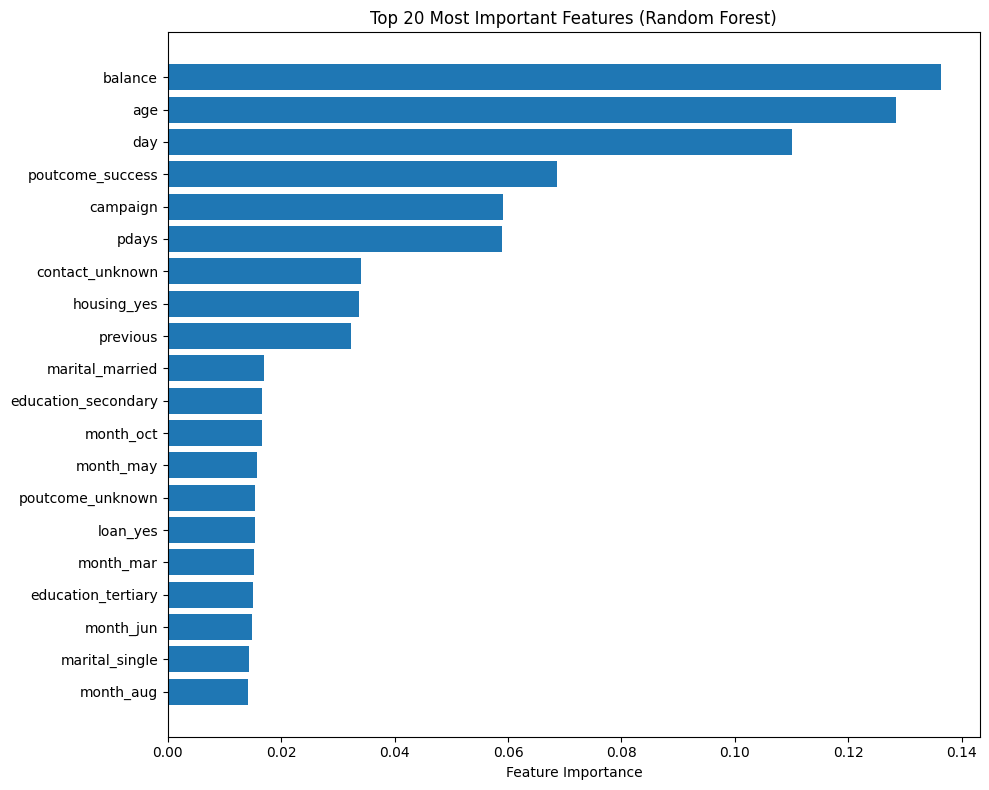

In [89]:
feature_importance = pd.DataFrame({
    'feature': X_train_encoded.columns,
    'importance': grid_rf.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Part 5

In [90]:
tree_results = []

tree_results.append(evaluate_model(dt_classifier, X_test_encoded, y_test, "DecisionTree (Basic)"))
tree_results.append(evaluate_model(grid_dt, X_test_encoded, y_test, "DecisionTree (Tuned)"))
tree_results.append(evaluate_model(rf_classifier, X_test_encoded, y_test, "RandomForest (Basic)"))
tree_results.append(evaluate_model(grid_rf, X_test_encoded, y_test, "RandomForest (Tuned)"))


Evaluation Metrics: DecisionTree (Basic)
Accuracy:                0.6891
Precision (Macro):       0.6400
Precision (Micro):       0.6891
Recall (Macro):          0.6451
Recall (Micro):          0.6891
F1 Score (Macro):        0.6421
F1 Score (Micro):        0.6891

Evaluation Metrics: DecisionTree (Tuned)
Accuracy:                0.7716
Precision (Macro):       0.7701
Precision (Micro):       0.7716
Recall (Macro):          0.6604
Recall (Micro):          0.7716
F1 Score (Macro):        0.6760
F1 Score (Micro):        0.7716

Evaluation Metrics: RandomForest (Basic)
Accuracy:                0.7816
Precision (Macro):       0.7555
Precision (Micro):       0.7816
Recall (Macro):          0.7014
Recall (Micro):          0.7816
F1 Score (Macro):        0.7169
F1 Score (Micro):        0.7816

Evaluation Metrics: RandomForest (Tuned)
Accuracy:                0.7879
Precision (Macro):       0.7690
Precision (Micro):       0.7879
Recall (Macro):          0.7037
Recall (Micro):          0.7879


In [91]:
tree_results_df = pd.DataFrame(tree_results)
print("\n" + "="*100)
print("Tree Model Comparison Summary")
print("="*100)
print(tree_results_df.to_string(index=False))


Tree Model Comparison Summary
               model  accuracy  precision_macro  precision_micro  recall_macro  recall_micro  f1_macro  f1_micro
DecisionTree (Basic)  0.689117         0.639953         0.689117      0.645054      0.689117  0.642118  0.689117
DecisionTree (Tuned)  0.771615         0.770134         0.771615      0.660401      0.771615  0.676004  0.771615
RandomForest (Basic)  0.781636         0.755525         0.781636      0.701422      0.781636  0.716894  0.781636
RandomForest (Tuned)  0.787928         0.769043         0.787928      0.703661      0.787928  0.721055  0.787928
